In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
fashion_ds=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_ds.load_data()#splitting data into test and train sets

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape #60000 images , 28x28 pixels per image

(60000, 28, 28)

In [5]:
train_images[0,24,24] # 24th row ,24th column pixel value of zeroth picture 

99

In [6]:
train_labels[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

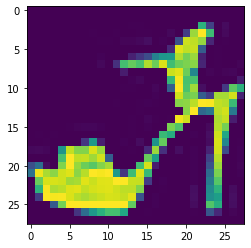

In [8]:
plt.figure()
plt.imshow(train_images[9])
plt.show()

In [9]:
#scaling image pixels to increase speed of ANN model
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [11]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6356 - accuracy: 0.7782
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8586
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.8758


In [13]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print("accuracy : ",test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3618 - accuracy: 0.8725
accuracy :  0.8725000023841858


In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0] #probabilities of each class label

array([2.9441796e-04, 4.7532894e-06, 2.3234804e-06, 1.1585669e-07,
       1.7291554e-06, 1.9222811e-02, 1.1229774e-05, 5.1340491e-02,
       2.5491466e-04, 9.2886722e-01], dtype=float32)

In [16]:
np.argmax(predictions[0]) #max probability is of class label at index 9

9

Predicted Label : Ankle boot


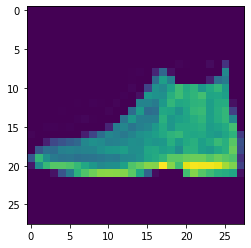

Actual label : Ankle boot


In [19]:
print("Predicted Label : "+class_names[np.argmax(predictions[0])])#answer --> first image
plt.figure()
plt.imshow(test_images[0])
plt.show()
print("Actual label : "+class_names[test_labels[0]])

In [20]:
test_images.shape

(10000, 28, 28)

Enter a number in interval of [0,10000) : 
3
Predicted Label : Trouser


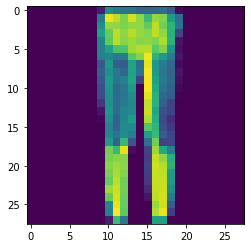

Actual label : Trouser
Accurate Prediction
Would you like to continue ? enter '0'  to exit
1
Enter a number in interval of [0,10000) : 
8
Predicted Label : Sandal


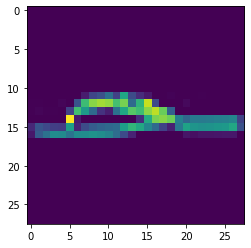

Actual label : Sandal
Accurate Prediction
Would you like to continue ? enter '0'  to exit
0


In [21]:
ans =1
while(ans!=0):
   print("Enter a number in interval of [0,10000) : ")
   n = int(input())
   print("Predicted Label : "+class_names[np.argmax(predictions[n])])#answer --> first image
   plt.figure()
   plt.imshow(test_images[n])
   plt.show()
   print("Actual label : "+class_names[test_labels[n]])
   if((class_names[np.argmax(predictions[n])])==(class_names[test_labels[n]])):
       print("Accurate Prediction")
   else:
       print("Inaccurate Prediction")
   print("Would you like to continue ? enter '0'  to exit")
   ans = int(input())